In [4]:
#imports
from scipy import stats
import sympy as sp
import numpy as np

#plots
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# simulate H0
#use standard normal parameters
mu = 0
sigma = 1
n= 100 #samples per simulation
m = 1000 #number of simulations 

D = np.zeros(m)

for i in range(m):
    sample = np.sort(np.random.normal(mu, sigma, n))
    emp_cdf = np.arange(1, n+1) / n
    null_cdf = stats.norm.cdf(sample, loc=mu, scale=sigma)
    D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic

#95% critical value
ks_crit = np.percentile(D, 95)

In [8]:
data = np.random.normal(mu, sigma, size=n)  #observed data
data_sorted = np.sort(data)
empirical_cdf = np.arange(1, n+1) / n
null_cdf = stats.norm.cdf(data_sorted, loc=mu, scale=sigma)
ks_observed = np.max(np.abs(empirical_cdf - null_cdf))  #observed KS statistic

#compute p-value
p_value = np.mean(D >= ks_observed)  #proportion of KS statistics >= observed KS
indicator(p_value)

'Fail to Reject H0'

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


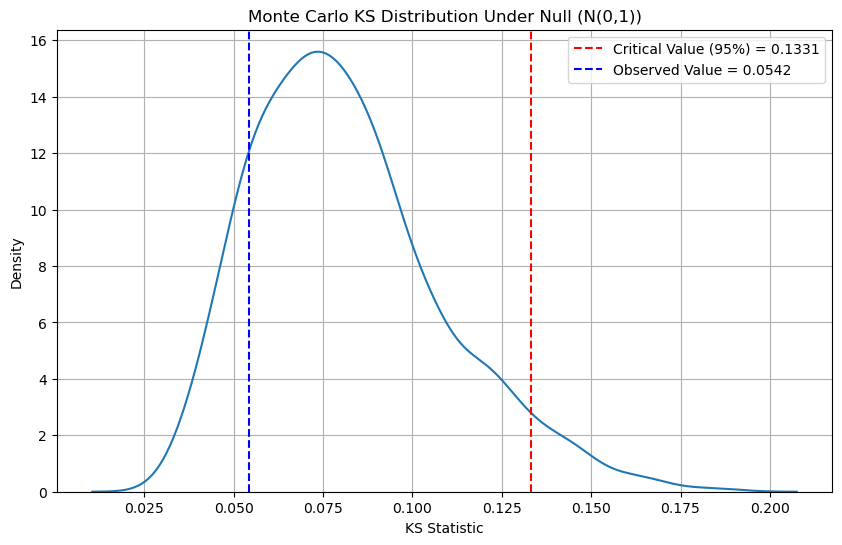

In [9]:
plt.figure(figsize=(10,6))
sns.kdeplot(D) #can change to hist to show bins
plt.axvline(ks_crit, color='red', linestyle='--', label=f"Critical Value (95%) = {ks_crit:.4f}")
plt.axvline(ks_observed, color='blue', linestyle='--', label=f"Observed Value = {ks_observed:.4f}")
plt.title("Monte Carlo KS Distribution Under Null (N(0,1))")
plt.xlabel("KS Statistic")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def indicator(p_val):
    if p_value <= 0.05:
        return("Reject H0")
    else:
        return("Fail to Reject H0")

In [11]:
def ks_test(data, mu, sigma, n, m, crit_val_perc):
    """
    Function to simulate the probability density of a KS-Test using Monte Carlo.
    ---
    Parameters: 'data' is the observed data.
                'mu' is the chosen mean of the distribution.
                'n' is the # of samples per simulation.
                'm' is the # of simulations.
                'crit_val_perc' is the percentile of which the critical value will be calculated.
    Returns:
        - critical value of null hypothesis 'ks_crit'
        - observed ks-statistic
        - p_value
        - indicator whether to reject the null hypothesis
    """
    D = np.zeros(m)

    for i in range(m):
        sample = np.sort(np.random.normal(mu, sigma, n))
        emp_cdf = np.arange(1, n+1) / n
        null_cdf = stats.norm.cdf(sample, loc=mu, scale=sigma)
        D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic

    #__% critical value
    ks_crit = np.percentile(D, crit_val_perc)

    data_sorted = np.sort(data)
    empirical_cdf = np.arange(1, n+1) / n
    null_cdf = stats.norm.cdf(data_sorted, loc=mu, scale=sigma)
    ks_observed = np.max(np.abs(empirical_cdf - null_cdf))  #observed KS statistic

    #empirical p-value
    p_value = np.mean(D >= ks_observed)
    return {"ks_crit": ks_crit, "ks_observed": ks_observed, "p_value": p_value, "indicator_fn": indicator(p_value)}

In [12]:
ks_test(data, 0, 1, 100, 1000, 95)

{'ks_crit': 0.12781110869739234,
 'ks_observed': 0.0541582946959307,
 'p_value': 0.847,
 'indicator_fn': 'Fail to Reject H0'}

C:\Users\panda\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


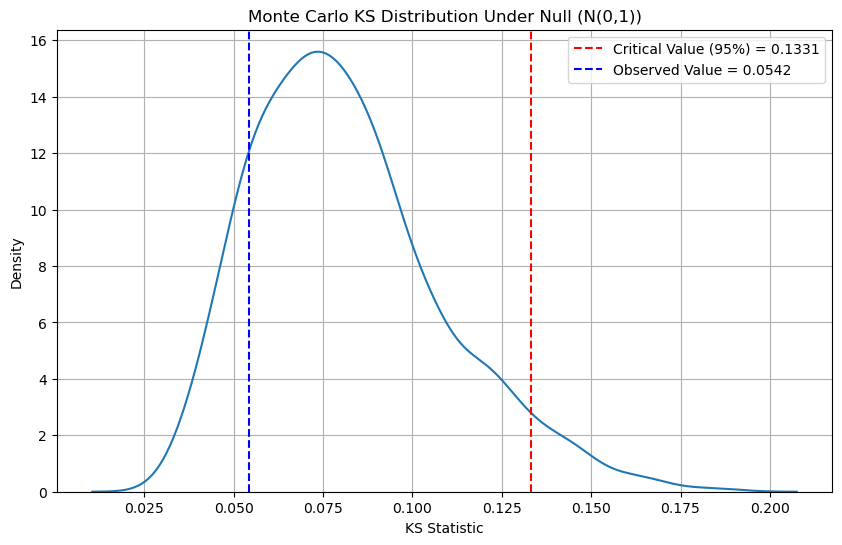

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(D) #can change to hist to show bins
plt.axvline(ks_crit, color='red', linestyle='--', label=f"Critical Value (95%) = {ks_crit:.4f}")
plt.axvline(ks_observed, color='blue', linestyle='--', label=f"Observed Value = {ks_observed:.4f}")
plt.title("Monte Carlo KS Distribution Under Null (N(0,1))")
plt.xlabel("KS Statistic")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()